In [27]:
import numpy as np
import matplotlib.pyplot as plt

(0.0, 1.0)

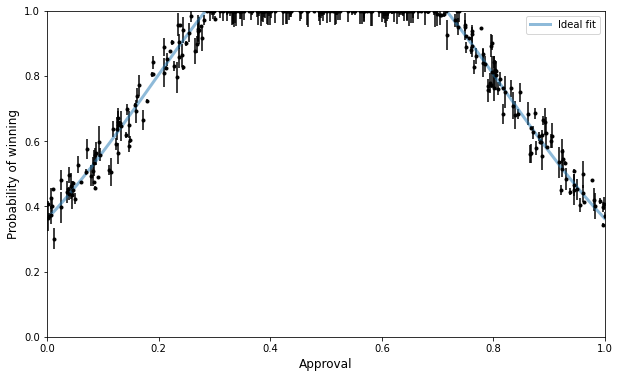

In [28]:
N = 300
true_mu = 0.5
true_sigma2 = 0.1

np.random.seed(1111)
x = np.sort(np.random.rand(N))
y = 1/(2*np.pi*true_sigma2)**0.5 * np.exp(-(x-true_mu)**2/(2*true_sigma2)) + 0.1*(np.random.rand(N) - np.random.rand(N))
for i in range(len(y)):
    if y[i] < 0:
        y[i] = 0
    elif y[i] > 1:
        y[i] = 1
yerr = 0.05 * np.random.rand(N)

plt.figure(figsize = (10, 6))
plt.errorbar(x, y, yerr, fmt=".k")
line = 1/(2*np.pi*true_sigma2)**0.5 * np.exp(-(x-true_mu)**2/(2*true_sigma2))
plt.plot(x, line, alpha = 0.5, lw = 3, label = "Ideal fit")
plt.legend()
plt.xlabel('Approval', size = 12)
plt.ylabel('Probability of winning', size = 12)
plt.xlim(0, 1)
plt.ylim(0, 1)

In [29]:
def log_likelihood(theta, y):
    mu, sigma2 = theta
    return -0.5*np.log(sigma2) - np.sum((y - mu)**2)/(2*sigma2)

def log_prior(theta):
    mu, sigma2 = theta
    return -(true_mu - mu)**2/(2*sigma2) - 0.5 * np.log(sigma2)

def log_posterior(theta, y):
    lp = log_prior(theta)
    ll = log_likelihood(theta, y)
    if not np.isfinite(lp):
        return -np.inf
    if not np.isfinite(ll):
        return -np.inf
    return lp + log_likelihood(theta, y)

In [30]:
import emcee

num_iter = 5000
ndim = 2
nwalkers = 32
initial_pos = np.array((1., 1.)) + 0.01 * np.random.randn(nwalkers, ndim)

sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=[y])
sampler.run_mcmc(initial_pos, num_iter, progress=True);

  0%|                                                                                         | 0/5000 [00:00<?, ?it/s]C:\Users\slsun\AppData\Local\Temp/ipykernel_11952/1033168777.py:7: RuntimeWarning: invalid value encountered in log
  return -(true_mu - mu)**2/(2*sigma2) - 0.5 * np.log(sigma2)
C:\Users\slsun\AppData\Local\Temp/ipykernel_11952/1033168777.py:3: RuntimeWarning: invalid value encountered in log
  return -0.5*np.log(sigma2) - np.sum((y - mu)**2)/(2*sigma2)
100%|█████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:11<00:00, 422.35it/s]


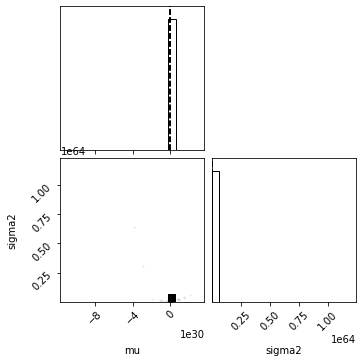

In [31]:
import corner

flat_samples = sampler.get_chain(discard=100, thin=15, flat=True)

labels = ['mu', 'sigma2']
fig = corner.corner(flat_samples, labels=labels, quantiles=[0.16, 0.5, 0.84]);

Text(0, 0.5, 'Probability of winning')

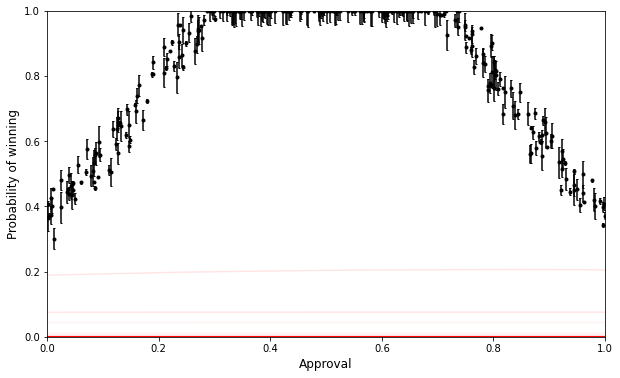

In [32]:
inds = np.random.randint(len(flat_samples), size=100)
x0 = np.linspace(0, 1, 300)
f, ax = plt.subplots(figsize=(10,6))
for ind in inds:
    sample = flat_samples[ind]
    ax.plot(x0, 1/(2*np.pi*sample[1])**0.5 * np.exp(-(x-sample[0])**2/(2*sample[1])), alpha=0.05, color='red')
ax.errorbar(x, y, yerr=yerr, linestyle = 'None',capsize=1, marker ='o', color='black', ms=3)
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_xlabel('Approval', size = 12)
ax.set_ylabel('Probability of winning', size = 12)